<a id=top-page></a>
# `pykitPIV` demo: Generate synthetic images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#generate-velocity-field">Generate random velocity field to advect the particles</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-update-time-sep">Update time separation</a></li>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
    <li><a href="#save">Save the dataset</a></li>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [3]:
n_images = 2

In [4]:
image_size = (240,500)

In [5]:
size_buffer = 10

In [6]:
origin = 'lower'

In [7]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [8]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.05,0.06),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [9]:
image = Image(random_seed=100)

In [10]:
image.add_particles(particles)

Particles added to the image.


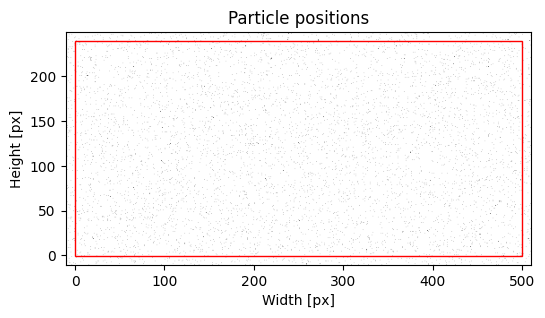

In [11]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           origin=origin,
           figsize=figsize, 
           filename='particle-positions.png');

In [12]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/20)

Reflected light added to images I1.


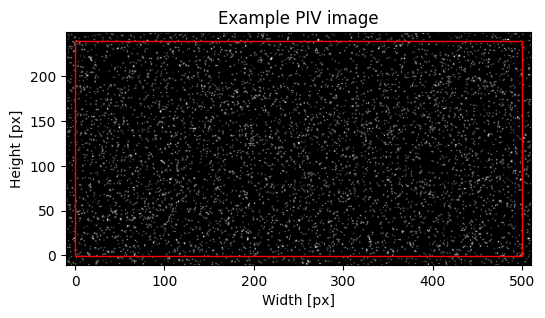

In [13]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename='example-image.png');

In [14]:
# plt.scatter(particles.particle_coordinates[0][1], particles.particle_coordinates[0][0], c='k', s=10, zorder=10)
# plt.xticks([i for i in range(0,particles.size_with_buffer[1]+1)])
# plt.yticks([i for i in range(0,particles.size_with_buffer[0]+1)])
# plt.grid(zorder=1)

<a id=generate-velocity-field></a>
***

## Generate random velocity field to advect the particles

[Go to the top](#top-page)

In [15]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

In [16]:
flowfield.generate_random_velocity_field(gaussian_filters=(10,11),
                                         n_gaussian_filter_iter=20,
                                         displacement=(0,10))

In [17]:
image.add_flowfield(flowfield)

Velocity field added to the image.


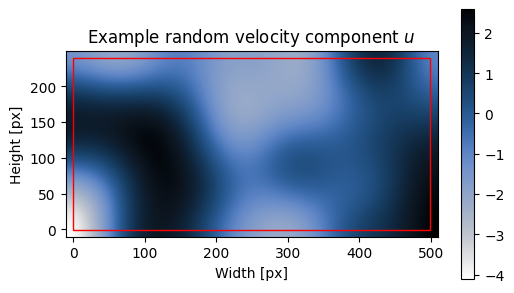

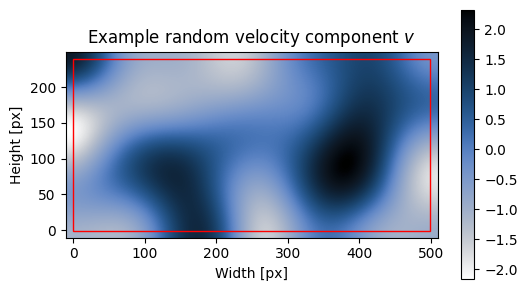

In [18]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          origin=origin,
                          figsize=figsize,
                          filename='example-random-velocity-field.png');

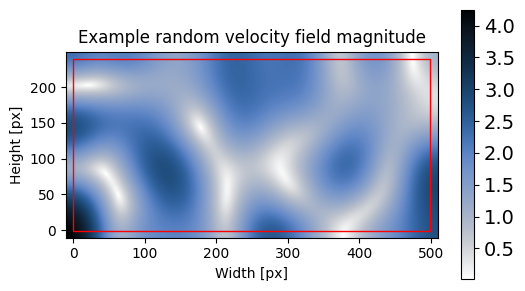

In [19]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    origin=origin,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude.png');

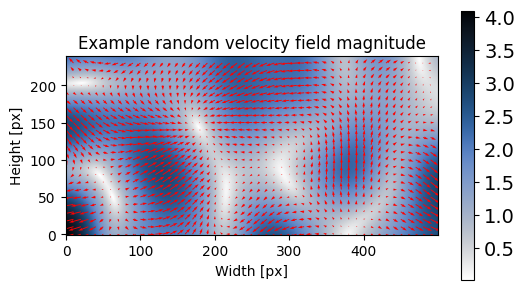

In [20]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    origin=origin,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-quiver.png');

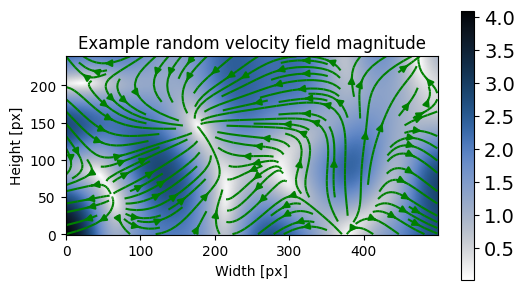

In [21]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    origin=origin,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-streamplot.png');

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [22]:
motion = Motion(particles, 
                flowfield, 
                time_separation=1)

In [23]:
motion.forward_euler(n_steps=10)

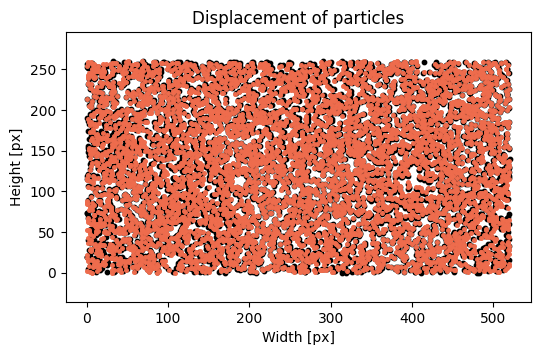

In [24]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-1.png');

<a id=add-movement-update-time-sep></a>

#### Update time separation:

[Go to the top](#top-page)

In [25]:
motion.time_separation = 2

In [26]:
motion.forward_euler(n_steps=10)

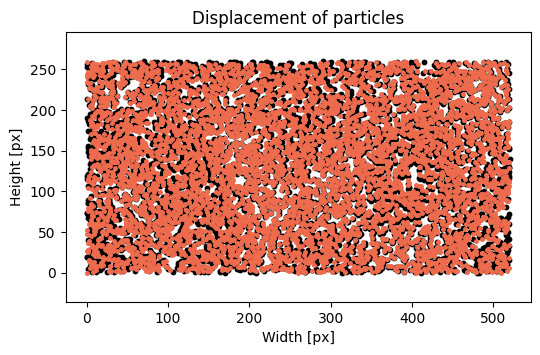

In [27]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-2.png');

In [28]:
motion.runge_kutta_4th(n_steps=10)

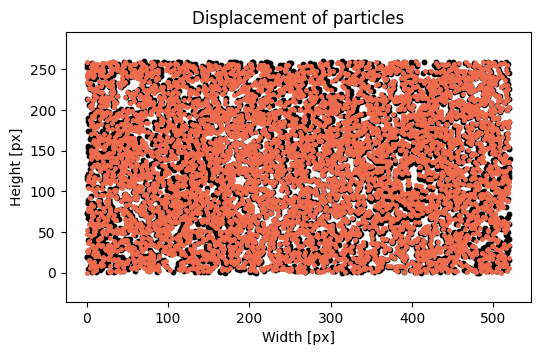

In [29]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-RK4.png');

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [30]:
image.add_motion(motion)

Particle movement added to the image.


In [31]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.
Reflected light added to images I2.


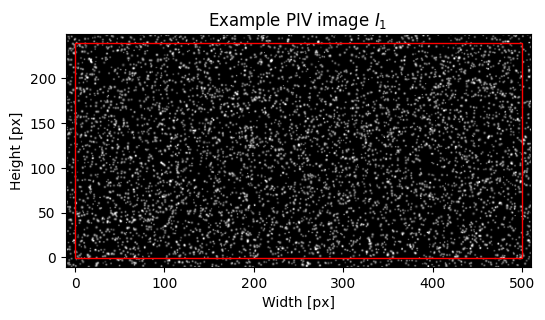

In [32]:
image.plot(0, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename='example-image-I1-with-buffer.png');

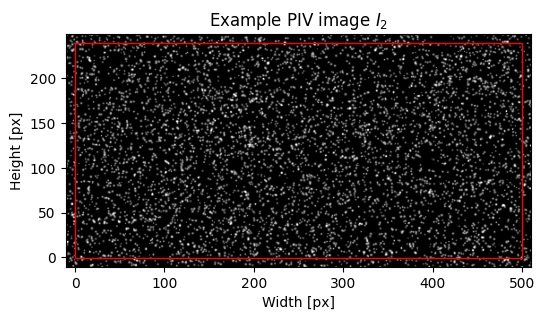

In [33]:
image.plot(0, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           origin=origin,
           figsize=figsize, 
           filename='example-image-I2-with-buffer.png');

MovieWriter ffmpeg unavailable; using Pillow instead.


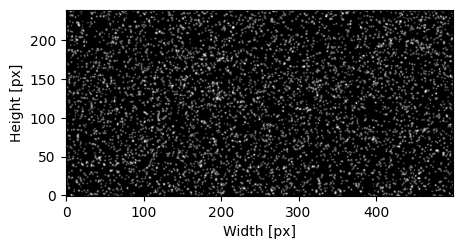

In [36]:
image.animate_image_pair(0, 
                         with_buffer=False, 
                         xlabel='Width [px]',
                         ylabel='Height [px]',
                         title=None, 
                         cmap='Greys_r', 
                         origin=origin,
                         figsize=(5, 5), 
                         dpi=300, 
                         filename='anim.gif')

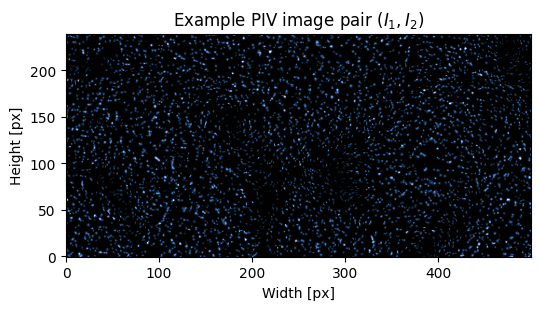

In [34]:
image.plot_image_pair(0,
                      with_buffer=False, 
                      xlabel='Width [px]',
                      ylabel='Height [px]',
                      title='Example PIV image pair $(I_1, I_2)$',
                      cmap=cmc.oslo,
                      origin=origin,
                      figsize=figsize, 
                      dpi=600,
                      filename='example-image-I1-I2-no-buffer.png');

In [35]:
image.images_I1.shape

(2, 1, 260, 520)

<a id=save></a>
***

## Save the dataset

[Go to the top](#top-page)

Note, that at the last stage of the PIV image generation we may want to remove buffers from the image by running the `Image.remove_buffers()` function:

In [42]:
image.remove_buffers()

Buffers removed from images I1.
Buffers removed from images I2.
Buffers removed from the velocity field.


In [43]:
images_tensor = image.image_pairs_to_tensor()

In [44]:
images_tensor.shape

(2, 2, 240, 500)

In [45]:
targets_tensor = image.targets_to_tensor()

In [46]:
tensors_dictionary = {"I"      : images_tensor, 
                      "targets": targets_tensor}

In [47]:
image.save_to_h5(tensors_dictionary, 
                 filename='pykitPIV-tutorial-PIV-pairs.h5')

<a id=upload></a>
***

## Upload the saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [48]:
from pykitPIV import Image

In [49]:
image = Image()

In [50]:
tensors_dictionary_uploaded = image.upload_from_h5(filename='pykitPIV-tutorial-PIV-pairs.h5')

***